In [18]:
import argparse
import sys
import glob
import os
import numpy as np
import shutil
import json
import cv2
from PIL import Image
import char_segmentation_evaluation
import statistics
from matplotlib.pyplot import imshow


In [10]:
images = ['/media/jones/datarec/lpr/dataset/cvat_dataset_raw/dataset_char/train/images/0/fr_l5_006_2804_1430_1825_0015_0115000001211_0_1.jpg','/media/jones/datarec/lpr/dataset/cvat_dataset_raw/dataset_char/train/images/0/fr_l5_006_2804_1430_1825_0015_0115000001226_0_3.jpg']
sub_images = np.array([np.array(Image.open(fname)) for fname in images])
height_list = []
width_list = []
for image in sub_images:
    heigth, width = image.shape[0:2]
    height_list.append(heigth)
    width_list.append(width)
    print((heigth, width))
mean_heigth = statistics.mean(height_list)
mean_width = statistics.mean(width_list)
print('mean width: %f | mean heigth: %f' % (mean_width, mean_heigth) )

(16, 14)
(19, 11)
mean width: 12.500000 | mean heigth: 17.500000


In [26]:
caminho_train='/media/jones/datarec/lpr/dataset/cvat_dataset_raw/dataset_char/train/images'
directories = [x[0] for x in os.walk(caminho_train)][2:]
height_list = []
width_list = []
image_filename_list = []
for directory in directories:
    filelist = glob.glob(directory+'/*.jpg')
    sub_images = np.array([np.array(Image.open(fname)) for fname in filelist])
    for idx, image in enumerate(sub_images):
        heigth, width = image.shape[0:2]
        height_list.append(heigth)
        width_list.append(width)
        image_filename_list.append(filelist[idx])
mean_heigth = statistics.mean(height_list)
mean_width = statistics.mean(width_list)
print('mean width: %f | mean heigth: %f' % (mean_width, mean_heigth) )

mean width: 13.580058 | mean heigth: 20.855212


In [16]:
variance_heigth = statistics.pvariance(height_list)
variance_width = statistics.pvariance(width_list)
print('variance width: %f | variance heigth: %f' % (variance_width, variance_heigth) )

variance width: 11.414982 | variance heigth: 26.056356


In [17]:
print('max width: %f | max heigth: %f' % (max(width_list), max(height_list)) )
print('min width: %f | min heigth: %f' % (min(width_list), min(height_list)) )

max width: 27.000000 | max heigth: 44.000000
min width: 3.000000 | min heigth: 6.000000


(44, 18, 3)


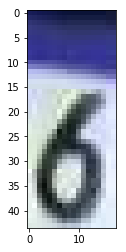

In [29]:
image_top_heigth_name = image_filename_list[height_list.index(max(height_list))]
image_top_heigth = Image.open(image_top_heigth_name)
nd_array_image = np.asarray(image_top_heigth)
print(nd_array_image.shape)
imshow(nd_array_image)

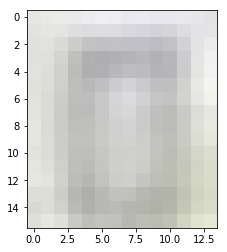

In [20]:
imshow(np.asarray(Image.open(images[0])))

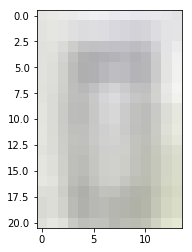

In [25]:
imshow(np.asarray(Image.open(images[0]).resize((14,21), Image.NEAREST)))